In [38]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('IIOT-temp-warn.csv')
df=pd.DataFrame(data,columns=['room_id/id', 'noted_date', 'temp', 'out/in', 'Month', 'name_months','temp_warn'])

# Crear una copia del DataFrame solo con las muestras con temp_warn igual a 1
df_temp_warn = df[df['temp_warn'] == 1].copy()

# Duplicar las muestras con temp_warn igual a 1
df_temp_warn_duplicated = pd.concat([df_temp_warn] * 10, ignore_index=True)

# Concatenar el DataFrame original con las muestras duplicadas
df_final = pd.concat([df, df_temp_warn_duplicated], ignore_index=True)

# Vamos a ordenarlas 
df_final.sort_values(by='noted_date', inplace=True)

# Reiniciar los índices del DataFrame
df_final.reset_index(drop=True, inplace=True)

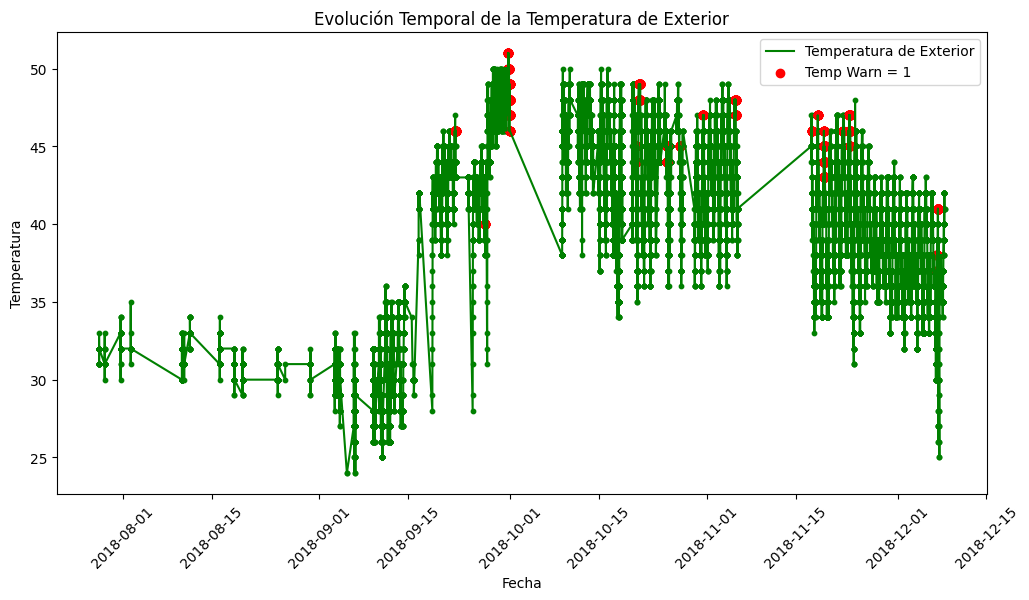

In [39]:
df_exterior = df_final[df_final['out/in'] == 'Out'].copy()

# Convertir 'noted_date' a formato de fecha con el formato adecuado
df_exterior['noted_date'] = pd.to_datetime(df_exterior['noted_date'], format='%d-%m-%Y %H:%M')

# Ordenar el DataFrame por la columna de fecha
df_exterior.sort_values(by='noted_date', inplace=True)

# Crear la figura y los ejes con un tamaño más grande
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar la evolución temporal de la temperatura de exterior con una línea y puntos
ax.plot(df_exterior['noted_date'].values, df_exterior['temp'].values, color='green', label='Temperatura de Exterior')
ax.scatter(df_exterior['noted_date'].values, df_exterior['temp'].values, color='green', s=10)

# Resaltar las temperaturas con temp_warn igual a 1 en rojo
df_temp_warn = df_exterior[df_exterior['temp_warn'] == 1]
ax.scatter(df_temp_warn['noted_date'].values, df_temp_warn['temp'].values, color='red', label='Temp Warn = 1')

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura')
ax.set_title('Evolución Temporal de la Temperatura de Exterior')
ax.legend()

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar la figura
plt.show()

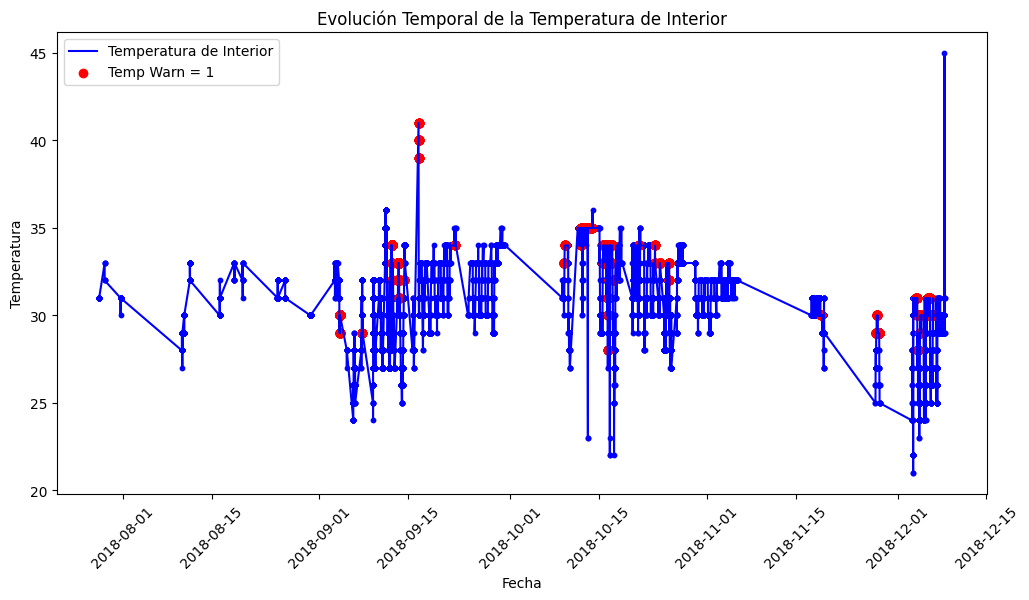

In [40]:
df_interior = df_final[df_final['out/in'] == 'In'].copy()

# Convertir 'noted_date' a formato de fecha con el formato adecuado
df_interior['noted_date'] = pd.to_datetime(df_interior['noted_date'], format='%d-%m-%Y %H:%M')

# Ordenar el DataFrame por la columna de fecha
df_interior.sort_values(by='noted_date', inplace=True)

# Crear la figura y los ejes con un tamaño más grande
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar la evolución temporal de la temperatura de interior con una línea y puntos
ax.plot(df_interior['noted_date'].values, df_interior['temp'].values, color='blue', label='Temperatura de Interior')
ax.scatter(df_interior['noted_date'].values, df_interior['temp'].values, color='blue', s=10)

# Resaltar las temperaturas con temp_warn igual a 1 en rojo
df_temp_warn = df_interior[df_interior['temp_warn'] == 1]
ax.scatter(df_temp_warn['noted_date'].values, df_temp_warn['temp'].values, color='red', label='Temp Warn = 1')

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura')
ax.set_title('Evolución Temporal de la Temperatura de Interior')
ax.legend()

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar la figura
plt.show()

In [41]:
df_final.loc[df_final['temp_warn'] > 0]

,room_id/id,noted_date,temp,out/in,Month,name_months,temp_warn
7001,Room Admin,03-12-2018 23:38,31,In,12,December,1
7002,Room Admin,03-12-2018 23:38,31,In,12,December,1
7003,Room Admin,03-12-2018 23:38,31,In,12,December,1
7004,Room Admin,03-12-2018 23:38,31,In,12,December,1
7005,Room Admin,03-12-2018 23:38,31,In,12,December,1
...,...,...,...,...,...,...,...
102723,Room Admin,31-10-2018 09:50,47,Out,10,October,1
102724,Room Admin,31-10-2018 09:50,47,Out,10,October,1
102725,Room Admin,31-10-2018 09:50,47,Out,10,October,1
102727,Room Admin,31-10-2018 09:50,47,Out,10,October,1


In [42]:
df_final.to_csv('IIOT-temp-warn.csv', encoding='utf-8')